# Importing Libraries 

In [1]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import mediapipe as mp
import time
from datetime import datetime
import os

# Mediapipe  

In [2]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model):
    result = model.process(image)
    return image, result

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )

# Model 

In [5]:
model = YOLO('best.pt')

# Class names

In [6]:
classnames = ['Adho', 'Alanasana', 'Anjaneyasana', 'Ardha', 'Ashta', 'Baddha', 'Bakasana', 'Balasana', 'Bandha', 
              'Bhujangasana', 'Bitilasana', 'Camatkarasana', 'Chandrasana', 'Dhanurasana', 'Eka', 'Garudasana', 
              'Halasana', 'Hanumanasana', 'Hasta', 'Kapotasana', 'Konasana', 'Malasana', 'Marjaryasana', 'Matsyendrasana', 
              'Mayurasana', 'Mukha', 'Navasana', 'One', 'Pada', 'Padangusthasana', 'Padmasana', 'Parsva', 'Parsvakonasana', 
              'Parsvottanasana', 'Paschimottanasana', 'Phalakasana', 'Pincha', 'Rajakapotasana', 'Salamba', 'Sarvangasana',
              'Setu', 'Sivasana', 'Supta', 'Svanasana', 'Svsnssana', 'Three', 'Trikonasana', 'Two', 'Upavistha', 'Urdhva', 
              'Ustrasana', 'Utkatasana', 'Uttanasana', 'Utthita', 'Vasisthasana', 'Virabhadrasana', 'Vrksasana']

# Testing rough 

In [7]:
image = cv2.imread('Padamasama.jpg')
output = model(image, show=True)
cv2.waitKey(0)


0: 384x640 1 Padmasana, 51.2ms
Speed: 8.5ms preprocess, 51.2ms inference, 188.5ms postprocess per image at shape (1, 3, 384, 640)


-1

# Integrate with mediapipe 

In [9]:
cv2.rectangle??


0: 384x640 1 Padmasana, 75.4ms
Speed: 6.0ms preprocess, 75.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


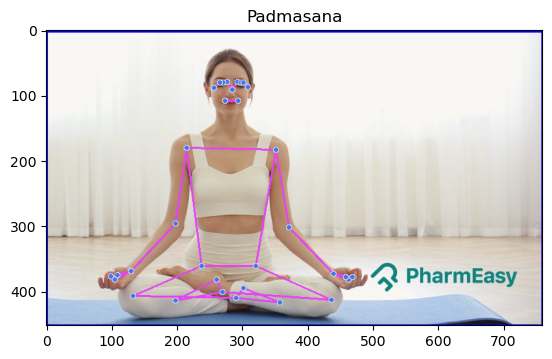

In [8]:
image = cv2.imread('Padamasama.jpg')
results = model(image, show=False)[0]
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    for result in results.boxes.data.tolist():
        x1,y1,x2,y2,score,class_id = result
        cv2.rectangle(image, (int(x1),int(y1)), (int(x2),int(y2)), (255,0,0), 2)
        
        image, out = mediapipe_detection(image,pose)
        
        draw_landmarks(image, out)
        plt.imshow(image[:,:,::-1])
        plt.title(classnames[int(class_id)])

In [9]:
results.names.values()

dict_values(['Adho', 'Alanasana', 'Anjaneyasana', 'Ardha', 'Ashta', 'Baddha', 'Bakasana', 'Balasana', 'Bandha', 'Bhujangasana', 'Bitilasana', 'Camatkarasana', 'Chandrasana', 'Dhanurasana', 'Eka', 'Garudasana', 'Halasana', 'Hanumanasana', 'Hasta', 'Kapotasana', 'Konasana', 'Malasana', 'Marjaryasana', 'Matsyendrasana', 'Mayurasana', 'Mukha', 'Navasana', 'One', 'Pada', 'Padangusthasana', 'Padmasana', 'Parsva', 'Parsvakonasana', 'Parsvottanasana', 'Paschimottanasana', 'Phalakasana', 'Pincha', 'Rajakapotasana', 'Salamba', 'Sarvangasana', 'Setu', 'Sivasana', 'Supta', 'Svanasana', 'Svsnssana', 'Three', 'Trikonasana', 'Two', 'Upavistha', 'Urdhva', 'Ustrasana', 'Utkatasana', 'Uttanasana', 'Utthita', 'Vasisthasana', 'Virabhadrasana', 'Vrksasana'])


0: 448x640 1 Anjaneyasana, 88.2ms
Speed: 6.4ms preprocess, 88.2ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


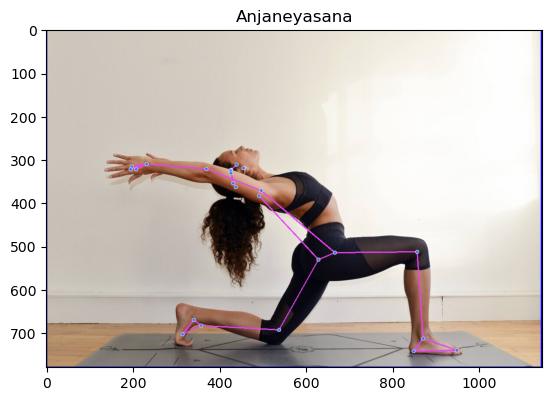

In [10]:
image = cv2.imread('Anjaneyasana.jpg')
results = model(image, show=False)[0]
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    for result in results.boxes.data.tolist():
        x1,y1,x2,y2,score,class_id = result
        cv2.rectangle(image, (int(x1),int(y1)), (int(x2),int(y2)), (255,0,0), 2)
        
        image, out = mediapipe_detection(image,pose)
        
        draw_landmarks(image, out)
        
        plt.imshow(image[:,:,::-1])
        plt.title(classnames[int(class_id)])

# Tesing with video 

In [11]:
cap = cv2.VideoCapture(0)

while True:
    
    ret, frame = cap.read()
    
    cv2.imshow('Sample', frame)
    if cv2.waitKey(1) == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [15]:
cap = cv2.VideoCapture(0)

cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1800)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1200)

while True:
    
    ret, frame = cap.read()
    
    cv2.imshow('video', frame)
    
    if cv2.waitKey(1) == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [7]:
time_stamp = []

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1800)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1200)

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    
    while True:
        
        ret, frame = cap.read()
        
        results = model(frame, show=False)[0]
        
        for result in results.boxes.data.tolist():
            x1, y1, x2, y2, score, class_id = result
            
            cv2.rectangle(frame, (int(x1),int(y1)), (int(x2),int(y2)), (0,0,255), 4)
            
            cv2.rectangle(frame, (10,10), (300,80), (255,0,0), -1)
            cv2.putText(frame, classnames[int(class_id)], (40,50), cv2.FONT_HERSHEY_DUPLEX, 1, (0,255,0), 1)
            
            try:
                if class_id:
                    now = datetime.now()
                    start_time = now.strftime("%H:%M:%S")
                    time_stamp.append(start_time)

                    t1 = datetime.strptime(time_stamp[0], "%H:%M:%S")

                    t2 = datetime.strptime(time_stamp[-1], "%H:%M:%S")

                    delta = (t2 - t1)
                    df = "Hold this Exercise position for "+str(8-int(delta.total_seconds()))+" sec."
                    if 8-int(delta.total_seconds())<0:
                        df = "YOU COMPLETED THIS SET"
                    
                    cv2.rectangle(frame, (1500,12),(900,73),(23,210,28),-1)
                    cv2.putText(frame,str(df) ,(920,40),cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
                
                else:
                    time_stamp = []
            
            except:
                pass
                
            image, out = mediapipe_detection(frame,pose)
        
            draw_landmarks(image, out)
            
            cv2.imshow('Output', frame)
            
        if cv2.waitKey(1) == ord('q'):
                break

    cap.release()
    cv2.destroyAllWindows()


0: 384x640 1 Anjaneyasana, 62.0ms
Speed: 14.4ms preprocess, 62.0ms inference, 195.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 16.5ms
Speed: 3.8ms preprocess, 16.5ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 9.7ms
Speed: 3.5ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 11.9ms
Speed: 2.5ms preprocess, 11.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 14.9ms
Speed: 3.0ms preprocess, 14.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 11.9ms
Speed: 2.1ms preprocess, 11.9ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 17.7ms
Speed: 2.0ms preprocess, 17.7ms inference, 2.6ms postprocess pe

In [10]:
cap.release()
cv2.destroyAllWindows()

In [7]:
# time_stamp = []

# count = 2

# yoga = 'Adho'

# newName = ['Adho', 'Alanasana', 'Anjaneyasana', 'Ardha', 'Ashta', 'Baddha', 'Bakasana', 'Balasana', 'Bandha', 
#               'Bhujangasana', 'Bitilasana', 'Camatkarasana', 'Chandrasana', 'Dhanurasana', 'Eka', 'Garudasana', 
#               'Halasana', 'Hanumanasana', 'Hasta', 'Kapotasana', 'Konasana', 'Malasana', 'Marjaryasana', 'Matsyendrasana', 
#               'Mayurasana', 'Mukha', 'Navasana', 'One', 'Pada', 'Padangusthasana', 'Parsva', 'Parsvakonasana', 
#               'Parsvottanasana', 'Paschimottanasana', 'Phalakasana', 'Pincha', 'Rajakapotasana', 'Salamba', 'Sarvangasana',
#               'Setu', 'Sivasana', 'Supta', 'Svanasana', 'Svsnssana', 'Three', 'Trikonasana', 'Two', 'Upavistha', 'Urdhva', 
#               'Ustrasana', 'Utkatasana', 'Uttanasana', 'Utthita', 'Vasisthasana', 'Virabhadrasana', 'Vrksasana']

# cap = cv2.VideoCapture(0)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1800)
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1200)

# with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    
#     while True:
        
#         ret, frame = cap.read()
        
#         results = model(frame, show=False)[0]
        
#         for result in results.boxes.data.tolist():
#             x1, y1, x2, y2, score, class_id = result
            
#             cv2.rectangle(frame, (int(x1),int(y1)), (int(x2),int(y2)), (0,0,255), 4)
            
#             cv2.rectangle(frame, (10,10), (300,80), (255,0,0), -1)
#             #cv2.putText(frame, classnames[int(class_id)], (40,50), cv2.FONT_HERSHEY_DUPLEX, 1, (0,255,0), 1)
#             cv2.putText(frame, yoga, (40,50), cv2.FONT_HERSHEY_DUPLEX, 1, (0,255,0), 1)
            
#             try:
#                 if yoga in newName:
#                     now = datetime.now()
#                     start_time = now.strftime("%H:%M:%S")
#                     time_stamp.append(start_time)
#                     t1 = datetime.strptime(time_stamp[0], "%H:%M:%S")

#                     t2 = datetime.strptime(time_stamp[-1], "%H:%M:%S")

#                     delta = (t2 - t1)
#                     print(delta)
#                     for i in range(count):
#                         cv2.rectangle(frame, (1500, 25), (1000, 140), (0, 0, 255), -1)
#                         cv2.rectangle(frame, (1500, 12), (900, 73), (23, 210, 28), -1)
#                         for sec in range(8, 0, -1):
#                             df = "Hold this Exercise position for " + str(sec) + " sec."
#                             cv2.putText(frame, str(df), (920, 40), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
#                             dfs = f"YOU COMPLETED {i} SET"
#                             cv2.putText(frame, str(dfs), (1050, 110), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
#                             print(i)
            
                
#                 else:
#                     time_stamp = []
            
#             except:
#                 pass
                
#             image, out = mediapipe_detection(frame,pose)
        
#             draw_landmarks(image, out)
            
#             cv2.imshow('Output', frame)
            
#         if cv2.waitKey(1) == ord('q'):
#                 break

# cap.release()
# cv2.destroyAllWindows()


0: 384x640 1 Salamba, 1 Sarvangasana, 48.0ms
Speed: 61.6ms preprocess, 48.0ms inference, 62.3ms postprocess per image at shape (1, 3, 384, 640)


0:00:00
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:00
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Dhanurasana, 12.1ms
Speed: 3.4ms preprocess, 12.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Dhanurasana, 14.0ms
Speed: 1.5ms preprocess, 14.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


0:00:00
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:00
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Dhanurasana, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Dhanurasana, 8.9ms
Speed: 2.0ms preprocess, 8.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



0:00:01
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:01
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


0: 384x640 (no detections), 18.0ms
Speed: 3.4ms preprocess, 18.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 13.7ms
Speed: 4.9ms preprocess, 13.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.9ms
Speed: 2.9ms preprocess, 10.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Paschimottanasana, 10.1ms
Speed: 2.1ms preprocess, 10.1ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Dhanurasana, 10.3ms
Speed: 3.1ms preprocess, 10.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


0:00:01
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:01
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Dhanurasana, 15.5ms
Speed: 0.0ms preprocess, 15.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Dhanurasana, 1 Paschimottanasana, 12.5ms
Speed: 3.0ms preprocess, 12.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


0:00:01
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:01
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Dhanurasana, 1 Paschimottanasana, 34.5ms
Speed: 4.0ms preprocess, 34.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


0:00:01
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:02
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Dhanurasana, 1 Paschimottanasana, 24.9ms


0:00:02
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


Speed: 3.0ms preprocess, 24.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


0:00:02
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:02
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Dhanurasana, 23.0ms
Speed: 3.5ms preprocess, 23.0ms inference, 8.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.0ms


0:00:02
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


Speed: 3.4ms preprocess, 26.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 27.1ms
Speed: 4.0ms preprocess, 27.1ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 21.5ms
Speed: 3.9ms preprocess, 21.5ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 23.3ms
Speed: 2.5ms preprocess, 23.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.7ms
Speed: 5.1ms preprocess, 25.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 19.5ms
Speed: 5.1ms preprocess, 19.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 21.4ms
Speed: 0.0ms preprocess, 21.4ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)


0:00:03
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 25.4ms
Speed: 5.9ms preprocess, 25.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 23.7ms
Speed: 3.0ms preprocess, 23.7ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)


0:00:03
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:03
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 (no detections), 22.7ms
Speed: 0.0ms preprocess, 22.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 24.2ms
Speed: 5.0ms preprocess, 24.2ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Dhanurasana, 19.6ms


0:00:04
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


Speed: 2.9ms preprocess, 19.6ms inference, 7.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.7ms
Speed: 5.3ms preprocess, 25.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:04
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 (no detections), 23.8ms
Speed: 2.1ms preprocess, 23.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Pincha, 21.7ms
Speed: 3.6ms preprocess, 21.7ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 18.7ms
Speed: 3.5ms preprocess, 18.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:04
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 24.3ms
Speed: 6.1ms preprocess, 24.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.6ms
Speed: 4.3ms preprocess, 30.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


0:00:04
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 24.3ms
Speed: 1.9ms preprocess, 24.3ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 64.0ms
Speed: 4.2ms preprocess, 64.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


0:00:05
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 (no detections), 27.7ms


0:00:05
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


Speed: 4.1ms preprocess, 27.7ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 19.5ms
Speed: 3.8ms preprocess, 19.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 20.9ms
Speed: 5.8ms preprocess, 20.9ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


0:00:05
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:05
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Ardha, 1 Padmasana, 24.3ms
Speed: 3.2ms preprocess, 24.3ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 19.2ms
Speed: 6.3ms preprocess, 19.2ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)



0:00:05
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:05
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


0: 384x640 1 Ardha, 1 Mayurasana, 25.4ms
Speed: 3.4ms preprocess, 25.4ms inference, 7.6ms postprocess per image at shape (1, 3, 384, 640)



0:00:06
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:06
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


0: 384x640 1 Dhanurasana, 28.1ms
Speed: 1.9ms preprocess, 28.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Dhanurasana, 22.8ms
Speed: 5.7ms preprocess, 22.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


0:00:06
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:06
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Dhanurasana, 1 Paschimottanasana, 20.5ms
Speed: 3.2ms preprocess, 20.5ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Dhanurasana, 1 Paschimottanasana, 25.2ms
Speed: 5.7ms preprocess, 25.2ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:06
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:06
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:06
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Paschimottanasana, 21.3ms
Speed: 3.7ms preprocess, 21.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:06
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:07
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Paschimottanasana, 31.3ms
Speed: 4.3ms preprocess, 31.3ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)



0:00:07
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


0: 384x640 1 Dhanurasana, 1 Paschimottanasana, 50.3ms
Speed: 5.9ms preprocess, 50.3ms inference, 9.5ms postprocess per image at shape (1, 3, 384, 640)


0:00:07
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:07
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Dhanurasana, 1 Paschimottanasana, 24.9ms
Speed: 2.8ms preprocess, 24.9ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



0:00:07
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:07
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


0: 384x640 1 Dhanurasana, 1 Paschimottanasana, 24.8ms
Speed: 5.6ms preprocess, 24.8ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Paschimottanasana, 24.8ms
Speed: 5.1ms preprocess, 24.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:07
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:07
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:07
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 (no detections), 28.0ms
Speed: 5.4ms preprocess, 28.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 22.1ms
Speed: 3.0ms preprocess, 22.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.8ms
Speed: 4.5ms preprocess, 35.8ms inference, 9.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 20.7ms
Speed: 4.6ms preprocess, 20.7ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Dhanurasana, 1 Paschimottanasana, 20.7ms
Speed: 3.7ms preprocess, 20.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



0:00:08
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:08
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


0: 384x640 (no detections), 26.8ms
Speed: 3.7ms preprocess, 26.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Dhanurasana, 32.4ms
Speed: 5.5ms preprocess, 32.4ms inference, 15.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Dhanurasana, 38.5ms


0:00:08
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


Speed: 3.0ms preprocess, 38.5ms inference, 12.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 22.2ms
Speed: 5.0ms preprocess, 22.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Dhanurasana, 21.0ms
Speed: 3.0ms preprocess, 21.0ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)


0:00:08
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Dhanurasana, 27.9ms
Speed: 0.0ms preprocess, 27.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


0:00:09
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:09
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Dhanurasana, 34.0ms
Speed: 4.3ms preprocess, 34.0ms inference, 17.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 23.0ms
Speed: 3.8ms preprocess, 23.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 25.6ms


0:00:09
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


Speed: 3.0ms preprocess, 25.6ms inference, 12.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Dhanurasana, 1 Padmasana, 28.0ms
Speed: 0.0ms preprocess, 28.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:09
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:09
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 38.3ms
Speed: 3.2ms preprocess, 38.3ms inference, 13.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:09
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:09
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Dhanurasana, 25.9ms
Speed: 0.0ms preprocess, 25.9ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 28.2ms
Speed: 6.2ms preprocess, 28.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Dhanurasana, 22.3ms
Speed: 3.8ms preprocess, 22.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:10
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 (no detections), 26.0ms
Speed: 3.7ms preprocess, 26.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)



0:00:10
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


0: 384x640 (no detections), 18.8ms
Speed: 3.8ms preprocess, 18.8ms inference, 10.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.1ms
Speed: 3.0ms preprocess, 25.1ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.8ms
Speed: 4.0ms preprocess, 25.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 26.0ms
Speed: 3.0ms preprocess, 26.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 22.6ms
Speed: 4.2ms preprocess, 22.6ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Dhanurasana, 39.0ms
Speed: 0.0ms preprocess, 39.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


0:00:10
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:10
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 21.7ms
Speed: 5.2ms preprocess, 21.7ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.1ms
Speed: 2.9ms preprocess, 25.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



0:00:11
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


0: 384x640 (no detections), 22.2ms
Speed: 1.5ms preprocess, 22.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 16.7ms
Speed: 2.0ms preprocess, 16.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 22.1ms
Speed: 2.7ms preprocess, 22.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 14.3ms
Speed: 1.1ms preprocess, 14.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)



0:00:11
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:11
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


0: 384x640 (no detections), 13.0ms
Speed: 2.2ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 11.8ms
Speed: 3.0ms preprocess, 11.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 14.4ms
Speed: 3.1ms preprocess, 14.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 13.5ms
Speed: 4.9ms preprocess, 13.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 13.6ms
Speed: 2.3ms preprocess, 13.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.8ms
Speed: 3.3ms preprocess, 12.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 16.9ms
Speed: 2.0ms preprocess, 16.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 16.6ms
Speed: 2.0ms preprocess, 16.6ms in

0:00:11
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:11
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


Speed: 1.8ms preprocess, 11.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.0ms
Speed: 3.8ms preprocess, 9.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.9ms
Speed: 2.1ms preprocess, 12.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.4ms
Speed: 1.4ms preprocess, 12.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.3ms


0:00:11
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


Speed: 2.1ms preprocess, 12.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 26.7ms
Speed: 2.0ms preprocess, 26.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 15.4ms
Speed: 5.5ms preprocess, 15.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 23.7ms
Speed: 2.1ms preprocess, 23.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.9ms


0:00:12
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


Speed: 3.4ms preprocess, 12.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 21.5ms
Speed: 3.0ms preprocess, 21.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 15.2ms
Speed: 1.3ms preprocess, 15.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.1ms
Speed: 3.9ms preprocess, 12.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.5ms
Speed: 2.0ms preprocess, 10.5ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 14.4ms
Speed: 3.2ms preprocess, 14.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 19.3ms
Speed: 2.5ms preprocess, 19.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.1ms postprocess per imag

0:00:12
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:12
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 (no detections), 23.7ms
Speed: 0.0ms preprocess, 23.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.4ms
Speed: 2.0ms preprocess, 12.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 20.6ms
Speed: 2.1ms preprocess, 20.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 22.0ms
Speed: 2.0ms preprocess, 22.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 14.5ms
Speed: 2.8ms preprocess, 14.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 17.3ms
Speed: 4.2ms preprocess, 17.3ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


0:00:13
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:13
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:13
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 (no detections), 12.3ms
Speed: 4.3ms preprocess, 12.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 13.0ms
Speed: 4.7ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 13.2ms
Speed: 2.6ms preprocess, 13.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 15.8ms
Speed: 0.0ms preprocess, 15.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 24.4ms
Speed: 2.1ms preprocess, 24.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Paschimottanasana, 12.9ms
Speed: 2.0ms preprocess, 12.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:13
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:13
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 (no detections), 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 21.4ms
Speed: 3.8ms preprocess, 21.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 23.1ms
Speed: 1.5ms preprocess, 23.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Paschimottanasana, 14.4ms
Speed: 0.0ms preprocess, 14.4ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Paschimottanasana, 14.8ms
Speed: 2.7ms preprocess, 14.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Paschimottanasana, 10.0ms
Speed: 2.9ms preprocess, 10.0ms inference, 7.1ms postprocess per image at shape (1, 3, 384, 640)


0:00:13
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:13
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:13
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Paschimottanasana, 13.1ms
Speed: 2.5ms preprocess, 13.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Paschimottanasana, 23.8ms
Speed: 2.6ms preprocess, 23.8ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 22.0ms


0:00:13
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:14
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


Speed: 2.7ms preprocess, 22.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 23.3ms
Speed: 3.0ms preprocess, 23.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 22.1ms
Speed: 2.5ms preprocess, 22.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Paschimottanasana, 24.2ms
Speed: 2.5ms preprocess, 24.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Bhujangasana, 1 Paschimottanasana, 21.7ms
Speed: 4.5ms preprocess, 21.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 18.9ms


0:00:14
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:14
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:14
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


Speed: 2.6ms preprocess, 18.9ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 14.2ms
Speed: 0.0ms preprocess, 14.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 10.8ms
Speed: 3.6ms preprocess, 10.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:14
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:14
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:14
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 12.5ms
Speed: 2.6ms preprocess, 12.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:14
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:14
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 16.8ms
Speed: 3.6ms preprocess, 16.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 15.5ms
Speed: 4.4ms preprocess, 15.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:14
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:14
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:15
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 10.6ms
Speed: 2.2ms preprocess, 10.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 18.8ms
Speed: 2.1ms preprocess, 18.8ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)


0:00:15
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:15
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:15
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 9.1ms
Speed: 1.5ms preprocess, 9.1ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 15.0ms


0:00:15
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:15
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


Speed: 2.2ms preprocess, 15.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 14.3ms
Speed: 2.4ms preprocess, 14.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 13.7ms


0:00:15
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:15
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


Speed: 0.0ms preprocess, 13.7ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 23.4ms
Speed: 3.9ms preprocess, 23.4ms inference, 8.1ms postprocess per image at shape (1, 3, 384, 640)


0:00:15
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:15
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 15.9ms
Speed: 6.2ms preprocess, 15.9ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 16.4ms
Speed: 2.0ms preprocess, 16.4ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 27.1ms
Speed: 6.0ms preprocess, 27.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


0:00:16
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:16
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 27.2ms
Speed: 2.0ms preprocess, 27.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Bhujangasana, 1 Padmasana, 27.5ms
Speed: 2.1ms preprocess, 27.5ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:16
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:16
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 24.4ms
Speed: 2.8ms preprocess, 24.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



0:00:16
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:16
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:16
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


0: 384x640 1 Padmasana, 26.2ms
Speed: 2.0ms preprocess, 26.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 28.1ms
Speed: 2.0ms preprocess, 28.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Bhujangasana, 1 Padmasana, 26.5ms


0:00:16
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:16
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


Speed: 3.0ms preprocess, 26.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 23.6ms
Speed: 3.0ms preprocess, 23.6ms inference, 6.6ms postprocess per image at shape (1, 3, 384, 640)



0:00:16
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:16
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:16
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


0: 384x640 1 Padmasana, 22.3ms
Speed: 2.8ms preprocess, 22.3ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 28.3ms
Speed: 1.7ms preprocess, 28.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



0:00:17
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:17
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


0: 384x640 1 Padmasana, 30.1ms
Speed: 3.4ms preprocess, 30.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 23.8ms
Speed: 2.8ms preprocess, 23.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 1 Paschimottanasana, 24.0ms
Speed: 2.4ms preprocess, 24.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:17
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:17
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:17
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Paschimottanasana, 25.8ms
Speed: 2.9ms preprocess, 25.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 24.3ms
Speed: 4.1ms preprocess, 24.3ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


0:00:17
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:17
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:17
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Bhujangasana, 1 Padmasana, 23.3ms
Speed: 5.4ms preprocess, 23.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Bhujangasana, 1 Padmasana, 29.7ms
Speed: 0.0ms preprocess, 29.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


0:00:17
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:17
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:17
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:17
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 28.0ms
Speed: 2.7ms preprocess, 28.0ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Bhujangasana, 1 Padmasana, 25.3ms
Speed: 3.9ms preprocess, 25.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:18
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:18
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:18
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 1 Paschimottanasana, 28.9ms
Speed: 0.0ms preprocess, 28.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 26.2ms
Speed: 2.0ms preprocess, 26.2ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:18
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:18
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:18
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Bhujangasana, 1 Padmasana, 25.2ms
Speed: 2.9ms preprocess, 25.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Bhujangasana, 1 Padmasana, 25.9ms
Speed: 4.3ms preprocess, 25.9ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)


0:00:18
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:18
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:18
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:18
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 22.0ms
Speed: 3.9ms preprocess, 22.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 22.6ms
Speed: 2.9ms preprocess, 22.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 26.1ms
Speed: 2.1ms preprocess, 26.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)



0:00:18
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:18
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:18
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


0: 384x640 1 Padmasana, 25.7ms
Speed: 2.4ms preprocess, 25.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Bhujangasana, 1 Padmasana, 17.8ms
Speed: 1.4ms preprocess, 17.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 13.9ms
Speed: 0.7ms preprocess, 13.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


0:00:18
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:19
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:19
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:19
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Bhujangasana, 1 Padmasana, 10.0ms
Speed: 1.1ms preprocess, 10.0ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 13.5ms
Speed: 1.4ms preprocess, 13.5ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 11.3ms


0:00:19
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:19
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:19
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


Speed: 2.3ms preprocess, 11.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 16.3ms
Speed: 2.8ms preprocess, 16.3ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 12.7ms
Speed: 1.2ms preprocess, 12.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


0:00:19
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:19
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:19
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 16.1ms
Speed: 2.2ms preprocess, 16.1ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 16.3ms
Speed: 1.4ms preprocess, 16.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 12.0ms
Speed: 3.0ms preprocess, 12.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


0:00:19
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:19
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:19
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 13.4ms
Speed: 1.5ms preprocess, 13.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 15.3ms
Speed: 0.0ms preprocess, 15.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 14.0ms
Speed: 0.0ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:19
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:19
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:20
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 13.2ms
Speed: 2.7ms preprocess, 13.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 12.7ms
Speed: 2.5ms preprocess, 12.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:20
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:20
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 14.2ms
Speed: 2.0ms preprocess, 14.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 11.3ms
Speed: 3.3ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


0:00:20
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:20
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 12.2ms
Speed: 1.4ms preprocess, 12.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 16.0ms
Speed: 0.0ms preprocess, 16.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 14.7ms


0:00:20
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:20
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


Speed: 3.7ms preprocess, 14.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 31.8ms
Speed: 0.0ms preprocess, 31.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


0:00:20
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:20
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 25.5ms
Speed: 4.4ms preprocess, 25.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 26.3ms
Speed: 3.7ms preprocess, 26.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:21
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:21
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 22.4ms
Speed: 4.2ms preprocess, 22.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 21.8ms
Speed: 3.3ms preprocess, 21.8ms inference, 7.8ms postprocess per image at shape (1, 3, 384, 640)


0:00:21
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:21
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 26.4ms
Speed: 3.2ms preprocess, 26.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 22.5ms
Speed: 3.0ms preprocess, 22.5ms inference, 7.1ms postprocess per image at shape (1, 3, 384, 640)


0:00:21
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:21
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 21.0ms
Speed: 3.9ms preprocess, 21.0ms inference, 9.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 29.5ms
Speed: 3.1ms preprocess, 29.5ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)



0:00:21
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:21
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


0: 384x640 1 Padmasana, 85.1ms
Speed: 8.1ms preprocess, 85.1ms inference, 12.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 24.1ms
Speed: 2.7ms preprocess, 24.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 24.3ms


0:00:22
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:22
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


Speed: 2.6ms preprocess, 24.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Bhujangasana, 21.3ms
Speed: 2.4ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:22
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:22
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Bhujangasana, 1 Salamba, 25.4ms
Speed: 4.2ms preprocess, 25.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 24.3ms
Speed: 2.9ms preprocess, 24.3ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)


0:00:22
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:22
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:22
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 23.7ms
Speed: 2.7ms preprocess, 23.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 24.0ms
Speed: 2.0ms preprocess, 24.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:22
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 (no detections), 23.0ms
Speed: 3.8ms preprocess, 23.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 25.4ms
Speed: 2.7ms preprocess, 25.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Konasana, 1 Padmasana, 21.0ms
Speed: 3.0ms preprocess, 21.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 21.1ms
Speed: 4.4ms preprocess, 21.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


0:00:23
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:23
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Bhujangasana, 22.1ms
Speed: 4.0ms preprocess, 22.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Bhujangasana, 1 Padmasana, 25.6ms
Speed: 3.2ms preprocess, 25.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:23
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:23
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:23
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 23.3ms
Speed: 2.5ms preprocess, 23.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Bhujangasana, 1 Padmasana, 24.4ms
Speed: 3.3ms preprocess, 24.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



0:00:23
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:24
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:24
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


0: 384x640 1 Padmasana, 23.9ms
Speed: 2.9ms preprocess, 23.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Bhujangasana, 53.9ms
Speed: 2.4ms preprocess, 53.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)



0:00:24
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:24
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


0: 384x640 1 Bhujangasana, 1 Padmasana, 65.5ms
Speed: 4.2ms preprocess, 65.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Bhujangasana, 10.8ms
Speed: 1.4ms preprocess, 10.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Bhujangasana, 1 Padmasana, 9.4ms


0:00:24
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:24
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:24
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


Speed: 1.7ms preprocess, 9.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Bhujangasana, 7.8ms
Speed: 2.0ms preprocess, 7.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.4ms
Speed: 2.8ms preprocess, 7.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


0:00:24
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:24
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:24
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Bhujangasana, 1 Padmasana, 15.4ms
Speed: 1.6ms preprocess, 15.4ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 5.4ms
Speed: 2.0ms preprocess, 5.4ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 7.8ms
Speed: 1.0ms preprocess, 7.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:24
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:24
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:24
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:24
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 9.0ms
Speed: 1.0ms preprocess, 9.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 8.3ms
Speed: 2.5ms preprocess, 8.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 8.4ms
Speed: 1.9ms preprocess, 8.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 6.9ms


0:00:25
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:25
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:25
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


Speed: 2.5ms preprocess, 6.9ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 9.6ms
Speed: 1.0ms preprocess, 9.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 9.2ms
Speed: 0.7ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


0:00:25
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:25
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:25
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 8.7ms
Speed: 1.1ms preprocess, 8.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 9.6ms
Speed: 1.4ms preprocess, 9.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 8.6ms
Speed: 1.4ms preprocess, 8.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


0:00:25
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:25
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:25
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 8.1ms
Speed: 1.5ms preprocess, 8.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 8.4ms
Speed: 1.0ms preprocess, 8.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


0:00:25
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:25
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 13.6ms
Speed: 2.0ms preprocess, 13.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 13.0ms
Speed: 2.3ms preprocess, 13.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


0:00:25
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:26
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Padmasana, 16.2ms
Speed: 1.1ms preprocess, 16.2ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Bhujangasana, 22.9ms
Speed: 3.9ms preprocess, 22.9ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



0:00:26
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:26
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


0: 384x640 1 Padmasana, 24.3ms
Speed: 3.0ms preprocess, 24.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 20.9ms
Speed: 3.6ms preprocess, 20.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:26
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 (no detections), 22.7ms
Speed: 3.1ms preprocess, 22.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 22.2ms
Speed: 4.4ms preprocess, 22.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Bhujangasana, 21.3ms
Speed: 0.5ms preprocess, 21.3ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 23.2ms
Speed: 4.5ms preprocess, 23.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Padmasana, 25.3ms
Speed: 2.0ms preprocess, 25.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:26
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:27
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1



0: 384x640 1 Bhujangasana, 1 Padmasana, 24.7ms
Speed: 4.2ms preprocess, 24.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


0:00:27
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
0:00:27
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1


In [22]:
time_stamp = []

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1800)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1200)

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    
    while True:
        
        ret, frame = cap.read()
        
        results = model(frame, show=False)[0]
        
        for result in results.boxes.data.tolist():
            x1, y1, x2, y2, score, class_id = result
            
            cv2.rectangle(frame, (int(x1),int(y1)), (int(x2),int(y2)), (0,0,255), 4)
            
            cv2.rectangle(frame, (10,10), (300,80), (255,0,0), -1)
            cv2.putText(frame, classnames[int(class_id)], (40,50), cv2.FONT_HERSHEY_DUPLEX, 1, (0,255,0), 1)
            
                
            image, out = mediapipe_detection(frame,pose)
        
            draw_landmarks(image, out)
            
            cv2.imshow('Output', frame)
            
        if cv2.waitKey(1) == ord('q'):
                break

    cap.release()
    cv2.destroyAllWindows()

8
7
6
5
4
3
2
